## COMP5712M: Programming for Data Science 

## Group project: Data Analysis Project


# An Analysis of Leeds Crime Patterns: A Comparative Study of Student-Heavy Wards


_Give names and emails of group members here:_

* Asjad Moiz Khan, gfqs0308@leeds.ac.uk
* Krithik Sharan Suresh Alagianayagi, mxnp0398@leeds.ac.uk
* Nilavan Sritharan, shvj0061@leeds.ac.uk
* Zhenny Marifatul Hasna, dpvq0990@leeds.ac.uk

# Project Requirements
_PLEASE DELETE THIS WHOLE CELL BEFORE SUBMITTING YOUR PROJECT_

The purpose of this assignment is to develop your skills
in organising and presenting a data analysis project.

Since most of the marks will be awarded for organisation
and presentation, it is suggested that you do not initially attempt
anything too complicated. However, once you have managed
to get a basic pipeline working that fits the guidelines, 
you are encouraged to extend and elaborate your analysis.

Your project should entirely be contained within this template file.
You should keep the basic structure indicated below. To facilitate
grading according to the marking scheme.

You _may_ import any module.


### Marking Scheme

The marking scheme  is as follows:

* Project Plan:
    * Description of data to be used (10)
    * Overview of Project Aims  (5)
    * Design  (5)
    
* Program Code: (15)<br>
    Code should be laid out in steps with explanations
    and intermediate output with comments. 
    You should ensure that the steps do not require
    a large amount of processing time.

* Project Outcome:
    * Explanation of Results (10)<br>
        This should include a qualitative description
        of the results as well as key figures and tables
        of results.
    * Results visualisation (10)<br>
        This should be graphical representations of the
        results with brief explanations (ordinary tables will be
        graded as part of the explanation of results)
    * Conclusion (5)

### Data Resources

You can use any data you like. Many useful resources are available.

The Data Resources section of the module (Unit 4.3 on Minerva) has links to several example data sets.

As a starting point you could browse the following:
* [Kaggle](https://www.kaggle.com/)
* [Our World in Data](https://ourworldindata.org/)
* [scikit-learn datasets](https://scikit-learn.org/stable/datasets.html)
* [scikit-learn tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)




### Using this Notebook Template
Please use this notebook as a template for your project file.
In the following cells of the notebook, _italic text_ giving explanations
and examples should be either deleted, or, in most cases, replaced by appropriate text describing your project. 
Text that is not in italic (which is mostly headings) should
be left as it is. __Your project report notebook should have the same overall
structure as this template notebook.__
An exception to this is the current markup cell describing the project
requiements. You should delete this before submitting your notebook.

# Project Plan

## The Data (10 marks)

_Here you should describe the data including details of:
where it comes from, what data it contains, is it accurate. (Potentially you could create data from a simulation but you should still explain why and how you intend to generate this data.)_

_It can be just one dataset or several that can be combined
somehow._

_There are 10 marks for this, so a fairly detailed description
of the data is expected. You should include details including the size, the features, range of values, and so on._



## Project Aim and Objectives (5 marks)

_Here you should describe the general aim of your project in
around 200-300 words._

_This can can be anything from classifying items according to
their characteristic features (which mushrooms are poisonous?) 
to simulating an evolving process (will the rabbits eat all
the carrots or get eaten by the foxes?)_

_Here some ideas of general types of processing functionality
that you could implement:_

* _Classification: separate data items into classes according
  to their charactersitics (can be either a definite or a
  statistical kind of classification)_
* _Corellation: find correspondences between different attributes within
  a dataset_
* _Search: find solutions matching some criteria_
* _Visualisation: find informative ways to
  display the structure of a large and/or complex dataset useful for decision making_
* _Query Answering: create a system that enables one to retrieve information by evaluating some form of query representation_
* _Simulation: model the evolution of a complex process_

### Specific Objective(s)

_You should chose and list __up to 4__ specific objectives suited to the data you will be working with and the type of project you wish to carry out according to the project aim. 
There should be <b>at least one
per person doing the project</b>. There is no need
for  the objectives them to be completely different. 
They could be different
stages of the processing requirements, or different processing
functions that the system  provides. Or just
different aspects of data analysis that will be conducted.
Typically, it is expected that there would be one objective
per person. Replace the following examples with your own objectives:_

* __Objective 1:__ _create a Python datastructure that will ensure world peace_
* __Objective 2:__ _stop global warming using a pandas dataframe_
* __Objective 3:__ _end poverty using matplotlib_
* __Objective 4:__ _end suffering with sklearn_

## System Design (5 marks)

_Describe your code in terms of the
following two sections._

### Architecture

_Typically this would be  a pipeline in which __data__ goes through several
stages of transformation and analysis, but other architectures are possible.
This does not need to be particularly complicated. A simple diagram with
100-150 words of explanation would
be a good way to present your architecture._
  
### Processing Modules and Algorithms

_Briefly list and describe the most significant computational components of your system and the algorithms you will use to implement them. 
This could include things like:_

* _cleaning the data by removing outliers_
* _combining different datasets_
* _converting samples to a special representation (such as feature vectors)_
* _constructing a special data-structure (such as a decision tree)_
* _running some kind of analysis_

_Your list can be presented in similar form to the one just given, 
but should include a brief
but more specific description of the components and/or algorithms.
Probably three or four components is sufficient for most projects, but
you may want to have more._

# Program Code (15 marks)

_Your code should be divided into relatively short cells, with brief
explanation in markup cells between._

_As noted in the assignment overview, it is not necessary that your coding be
super complex in order to get a good mark. Although there is a mark for
the coding achievement, it is only a quarter of the total._

_The suggested length of the code is about 150 lines for 1 person or 500
for a 4 people project. You should not use more than 500 lines of code._

_You should divide the code in accordance with the specification of modules and/or
algorithms you gave in the previous section. Complex modules should be further
divided into several code cells._

Please note the following about your code:
* <b><i>You may import any packages/modules you wish to use for your project.</i></b> However, for special packages/modules, it would be nice to put comments or a sentence on where these modules are used in the project.


* <b><i>You should submit your notebook in a state where all cells have been
    executed and are displaying the output that you wish to present for grading.</i></b>
    (We will not normally run your code, unless for some reason we wish to check
    that the code functionality matches the given description.)
    
    
* It is strongly suggested you use __function definitions to organise your code__. As well as being generally good programming practice, it will be helpful for easy and flexibily presentation of results visualisations later in the document. In the visualisation sections you will be able to produce images in a concise and flexible way by calling functions defined in the program code secion.

#### _Brief Explanation of following code cell_

_Below is a silly example of some trivial data. Replace this markup cell and the one below with something more interesting. And go on adding more until you have 
achieved your objectives (at least to some extent)._

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import glob

<H3>ALL NECESSARY FILE PATHS<H3>

In [4]:
# Source Data
SOURCE_CSV_PATTERN = "data/west-yorkshire-police-data/**/*.csv"
SHAPEFILE_PATH = "data/ward-boundary-uk/WD_DEC_2023_UK_BFE.shp"
LOOKUP_PATH = "data/Ward_to_Local_Authority_District_(December_2023)_Lookup_in_the_United_Kingdom.csv"

# Processed Checkpoints 
MERGED_CSV_PATH = "data/merged_west_yorkshire_street.csv"
LEEDS_WARDS_PATH = "data/leeds_wards.shp"

# Final Main Dataset
MAIN_DATA_PATH = "data/leeds_crime_data.gpkg"

<H3>HELPER FUNCTIONS</H3>

We are using data provided by `https://data.police.uk/data/`, where we got each month data is a separate file, so we decided to merge them all into a single CSV file.

In [5]:
# Merge all csv files into a single file.
def merge_csvs(source: str, destination_file: str) -> None:
    if os.path.exists(destination_file):
        print(f"File exists: {destination_file}")
        choice = input("Do you want to overwrite it? (Y/N): ").upper().strip()
        if choice != "Y":
            print("Merge skipped.")
            return
        os.remove(destination_file)

    # Get all the files ending with .csv.
    print(f"Finding files matching: {source}")
    files = glob.glob(source, recursive=True)
    if not files:
        print("Warning: No CSV files were found. No file created.")
        return

    print(f"Found {len(files)} files. Merging...")

    df_files = (pd.read_csv(csvfile) for csvfile in files)
    df_merge = pd.concat(df_files, ignore_index=True)
    df_merge.to_csv(destination_file, index=False)

    print(f"Success! '{destination_file}' has been created.")

The Ward Boundary file and the ONS Lookup file work as a team. The problem was that the best boundary file (from the ONS) contained all 8,000+ wards in the UK, with no column to tell us which ones were in Leeds. We used the lookup file first to create a simple list of the 33 ward codes that belong to Leeds. 

In [6]:
# Filters UK wards to get only Leeds wards, saving as a new shapefile.
def get_leeds_wards(shape_file: str, lookup_file: str, destination_file: str) -> None:
    if os.path.exists(destination_file):
        print(f"File exists: {destination_file}")
        choice = input("Do you want to overwrite it? (Y/N): ").upper().strip()
        if choice != "Y":
            print("Ward filtering skipped.")
            return
        os.remove(destination_file)

    print(f"Loading lookup file: {lookup_file}")
    df_lookup = pd.read_csv(lookup_file)
    # Get the list of Leeds ward codes
    df_leeds_lookup = df_lookup[df_lookup["LAD23NM"] == "Leeds"]
    leeds_ward_codes = df_leeds_lookup["WD23CD"].tolist()

    # making sure we found Leeds ward codes
    if len(leeds_ward_codes) == 0:
        print("Error: Could not find any ward codes for 'Leeds' in the lookup file.")
        print("Please check the 'LAD23NM' column and the file path.")
        return

    print(f"Found {len(leeds_ward_codes)} wards belonging to Leeds.")
    # This should print 33 wards

    # filter the shapefile to find Leeds specific one's
    print(f"Loading shapefile: {shape_file} (filtering for Leeds wards)...")

    # for memory efficiency using 'WHERE' clause to get only the 'WD23CD'
    ward_codes_as_sql_tuple = tuple(leeds_ward_codes)
    gdf_leeds_wards = gpd.read_file(shape_file, where=f"WD23CD IN {ward_codes_as_sql_tuple}")

    print(f"Found {len(gdf_leeds_wards)} matching wards in shapefile.")

    gdf_leeds_wards.to_file(destination_file)
    print(f"\nSuccess! Filtered shapefile saved to: {destination_file}")

In [7]:
# Loads, cleans, and returns the crime data and ward boundaries.
def load_and_clean(crime_csv_path: str, leeds_wards_path: str) -> tuple[pd.DataFrame, gpd.GeoDataFrame]:
    try:
        print(f"Loading crime CSV: {crime_csv_path}")
        df_crimes = pd.read_csv(crime_csv_path)
        print(f"Original crime records: {len(df_crimes)}")

        print("Cleaning coordinate data...")
        original_count = len(df_crimes)
        df_crimes = df_crimes.dropna(subset=["Longitude", "Latitude"])
        print(f"Dropped {original_count - len(df_crimes)} rows with missing coordinates.")

        print(f"Loading Leeds wards: {leeds_wards_path}")
        gdf_leeds_wards = gpd.read_file(leeds_wards_path)

    except FileNotFoundError as e:
        print("\n--- FATAL ERROR: File not found ---")
        print(f"{e.filename}")
        print("Please check your file paths. You may need to run the pipeline again (Y).")
        sys.exit(1)

    return df_crimes, gdf_leeds_wards

In [8]:
# Converts a crime DataFrame to a GeoDataFrame and aligns its CRS.
def convert_crime_to_geodataframe(df_crimes: pd.DataFrame, gdf_leeds_wards: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    print("Converting crime data to GeoDataFrame...")
    gdf_crimes = gpd.GeoDataFrame(
        df_crimes, geometry=gpd.points_from_xy(df_crimes["Longitude"], df_crimes["Latitude"]), crs="EPSG:4326"
    )
    print(f"Aligning CRS to {gdf_leeds_wards.crs}...")
    gdf_crimes = gdf_crimes.to_crs(gdf_leeds_wards.crs)
    return gdf_crimes


In [9]:
# Performs an inner spatial join to filter crimes within Leeds wards.
def perform_spatial_join(gdf_crimes: gpd.GeoDataFrame, gdf_leeds_wards: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    print("Performing spatial join (this may take a minute)...")
    original_crime_count = len(gdf_crimes)
    
    gdf_leeds_crimes = gpd.sjoin(gdf_crimes, gdf_leeds_wards, how="inner", predicate="within")

    print(f"Join complete. Filtered {original_crime_count} crimes down to {len(gdf_leeds_crimes)} (Leeds only).")
    return gdf_leeds_crimes


In [10]:
# Saves the final GeoDataFrame to a GeoPackage.
def save_leeds_crime(gdf: gpd.GeoDataFrame, destination_file: str) -> None:
    print(f"Saving main dataset to: {destination_file}")
    gdf.to_file(destination_file, driver="GPKG")
    
    print("--- Pipeline complete. Main dataset created. ---")

Performing final cleaning on the combined dataset, to make DataFrame smaller, faster, and much easier to read. <br>
    - Drops redundant columns. <br>
    - Renames columns to snake_case (best practice).<br>
    - Fills missing values.<br>
    - Converts data types.<br>

In [11]:
def clean_final_data(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    print("Performing final data cleaning...")
    
    # Drop unnecessary columns.
    columns_to_drop = [
        'Reported by', 'Falls within', 'Location', 
        'LSOA code', 'LSOA name', 'index_right', 'GlobalID',
        'Longitude', 'Latitude', 'BNG_E', 'BNG_N', 'LONG', 'LAT',
        'Context', 'WD23NMW', 'Crime ID'
    ]
    gdf = gdf.drop(columns=columns_to_drop, errors='ignore')
    
    # Renaming column name to a standard format and confusing codes to clear names.
    rename_map = {
        'WD23NM': 'ward_name',
        'WD23CD': 'ward_code',
        'Crime type': 'crime_type',
        'Last outcome category': 'last_outcome',
        'Month': 'date' 
    }
    gdf = gdf.rename(columns=rename_map)
    
    # Just in case we missed one (ensure all columns are lowercase).
    gdf.columns = gdf.columns.str.lower().str.replace(' ', '_')
    
    # Fill the missing values.
    if 'last_outcome' in gdf.columns:
        gdf['last_outcome'] = gdf['last_outcome'].fillna('Outcome not provided')
    
    # Optimise data types.
    if 'date' in gdf.columns:
        gdf['date'] = pd.to_datetime(gdf['date'])
        
    # Convert text columns to Categories
    cols_to_category = ['crime_type', 'last_outcome', 'ward_name', 'ward_code']
    for col in cols_to_category:
        if col in gdf.columns:
            gdf[col] = gdf[col].astype('category')
    
    print(f"Cleaning complete. Final columns: {gdf.columns.tolist()}")
    return gdf
    

<H3>MAIN SCRIPT CONTROLLER</H3>

In [12]:
def main():
    run_pipeline = False

    if not os.path.exists(MAIN_DATA_PATH):
        print(f"Main dataset not found at: {MAIN_DATA_PATH}")
        print("Running the full data processing pipeline...")
        run_pipeline = True
    else:
        print(f"Main dataset already exists: {MAIN_DATA_PATH}")
        choice = input("Do you want to recreate it? (Y/N): ").upper().strip()
        if choice == "Y":
            print("User requested recreation. Running the full pipeline...")
            run_pipeline = True
        else:
            print("Skipping pipeline.")

    if run_pipeline:
        # Step 1: Merge source CSVs
        merge_csvs(SOURCE_CSV_PATTERN, MERGED_CSV_PATH)

        # Step 2: Get Leeds ward boundaries
        get_leeds_wards(SHAPEFILE_PATH, LOOKUP_PATH, LEEDS_WARDS_PATH)

        # Step 3: Load and clean the merged data
        df_crimes, gdf_leeds_wards = load_and_clean(MERGED_CSV_PATH, LEEDS_WARDS_PATH)

        # Step 4: Convert crimes to a GeoDataFrame
        gdf_crimes = convert_crime_to_geodataframe(df_crimes, gdf_leeds_wards)

        # Step 5: Perform the spatial join (the filter)
        gdf_leeds_crimes = perform_spatial_join(gdf_crimes, gdf_leeds_wards)
        
        # STEP 6: Final Cleaning 
        gdf_leeds_crimes = clean_final_data(gdf_leeds_crimes)
        
        # Step 7: Save the final main file
        save_leeds_crime(gdf_leeds_crimes, MAIN_DATA_PATH)

    # Load the final data for analysis
    print(f"\nLoading main dataset: {MAIN_DATA_PATH}")
    try:
        gdf_leeds_crimes = gpd.read_file(MAIN_DATA_PATH)
        print(f"Successfully loaded {len(gdf_leeds_crimes)} Leeds crime records.")
        return gdf_leeds_crimes
    except Exception as e:
        print("--- FATAL ERROR ---")
        print(f"Could not load main file: {e}")
        print("Please try running the pipeline again (Y).")
        sys.exit(1)

if __name__ == "__main__":
    gdf_leeds_crimes = main()

Main dataset already exists: data/leeds_crime_data.gpkg
Skipping pipeline.

Loading main dataset: data/leeds_crime_data.gpkg
Successfully loaded 111396 Leeds crime records.


<H3>EDA</H3>

<b>Crime Distribution</b> <i>(What are the most frequent crimes in Leeds?)</i>

In [21]:
# Plots a horizontal bar chart of all crime types, sorted by frequency.
def plot_crime_distribution(gdf):
    plt.figure(figsize=(12, 8))

    sns.countplot(
        data=gdf,
        y="crime_type",
        hue="crime_type",
        order=gdf["crime_type"].value_counts().index,
        palette="pastel",
        legend=False,
    )

    plt.title("Distribution of Reported Crimes in Leeds (2024)")
    plt.xlabel("Number of Reports")
    plt.ylabel("Crime Type")
    plt.show()

<b>Overall Monthly Trend</b> <i>(Is crime increasing or decreasing? Are there seasonal spikes (e.g., December/Christmas or September/University Start)?)</i>

In [22]:
# Plots a line chart of the total number of crimes per month.
def plot_monthly_trend(gdf):
    monthly_counts = gdf.groupby("date").size().reset_index(name="crime_count")

    plt.figure(figsize=(12, 6))
    sns.lineplot(data=monthly_counts, x="date", y="crime_count", marker="o", linewidth=2.5, color="#2c3e50")

    peak_value = monthly_counts["crime_count"].max()
    peak_date = monthly_counts.loc[monthly_counts["crime_count"] == peak_value, "date"].iloc[0]

    plt.annotate(
        f"Peak: {peak_value}",
        xy=(peak_date, peak_value),
        xytext=(peak_date, peak_value + 500),
        arrowprops=dict(facecolor="red", shrink=0.05),
        horizontalalignment="center",
    )
    
    plt.title("Monthly Crime Trend in Leeds (2024)", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Total Incidents")
    plt.grid(True, linestyle="--", alpha=0.7)
    # Setting limits to make the trend clearer
    plt.ylim(7000, 11500)
    plt.show()

<b>Seasonal Trends</b>

The "Total" line often hides interesting stories because different crimes happen at different times. Instead of plotting all 14 crime type, we hypothetically picked specific crimes that represent different types of behaviour to contrast them.

The Baseline: Violence and sexual offences (High volume, usually consistent).

The Student/Weather Factor: Anti-social behaviour (Highly sensitive to weather and population).

The Seasonal Factor: Burglary (Sensitive to daylight hours).

The Control: Shoplifting (Usually consistent, maybe a Christmas spike).

In [23]:
# Plots a multi-line chart comparing the seasonal trends of specific crimes.
def plot_seasonal_trends(gdf):
    target_crimes = ["Violence and sexual offences", "Anti-social behaviour", "Burglary", "Shoplifting"]
    seasonal_gdf = gdf[gdf["crime_type"].isin(target_crimes)]
    seasonal_trends = (
        seasonal_gdf.groupby(["date", "crime_type"], observed=False).size().reset_index(name="count")
    )
    plt.figure(figsize=(14, 7))

    sns.lineplot(
        data=seasonal_trends,
        x="date",
        y="count",
        hue="crime_type",
        style="crime_type",
        markers=True,
        dashes=False,
        linewidth=2.5,
    )
    
    plt.title("Seasonal Trends: Comparing Key Crime Categories", fontsize=15)
    plt.xlabel("Date")
    plt.ylabel("Monthly Incidents")
    plt.legend(title="Crime Category", bbox_to_anchor=(1.05, 1), loc="upper left")  # Move legend outside
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

<b>Top Wards</b> <i>(Which wards are the most dangerous?)</i>

In [24]:
# Plots a horizontal bar chart of the top N wards by crime count.
def plot_top_wards(gdf, top_n=10):
    top_wards = gdf.ward_name.value_counts().reset_index(name="crime_count").head(top_n)

    plt.figure(figsize=(12, 8))

    sns.barplot(
        data=top_wards, x="crime_count", y="ward_name", hue="ward_name", palette="Reds_r", legend=False
    )

    plt.title(f"Top {top_n} Wards by Total Crime Volume in Leeds", fontsize=14)
    plt.xlabel("Total Reported Crimes")
    plt.ylabel("Ward Name")
    plt.grid(axis="x", alpha=0.3)
    plt.show()

<b>Outcome Distribution</b> <i>(How many crimes actually result in a suspect being caught?)</i>

In [25]:
# Plots a pie chart of grouped crime outcomes.
def plot_outcome_distribution(gdf):
    gdf_copy = gdf.copy()

    outcome_map = {
        "Investigation complete; no suspect identified": "No Suspect / Unsolved",
        "Unable to prosecute suspect": "Suspect Identified but No Prosecution",
        "Outcome not provided": "Data Unavailable",
        "Status update unavailable": "Data Unavailable",
        "Court result unavailable": "Data Unavailable",
        "Local resolution": "Police Action Taken",
        "Action to be taken by another organisation": "Transferred",
        "Awaiting court outcome": "Police Action Taken",
        "Further investigation is not in the public interest": "No Public Interest",
        "Offender given a caution": "Police Action Taken",
        "Suspect charged as part of another case": "Police Action Taken",
    }

    gdf_copy["outcome_group"] = gdf_copy["last_outcome"].map(outcome_map).fillna("Other")
    outcome_counts = gdf_copy["outcome_group"].value_counts()

    plt.figure(figsize=(12, 8))
    plt.pie(
        outcome_counts,
        labels=outcome_counts.index,
        autopct="%1.1f%%",
        colors=sns.color_palette("Set2"),
        startangle=140,
    )
    plt.title("Outcomes of Reported Crimes in Leeds")
    plt.show()

1. What are the most frequent crimes?


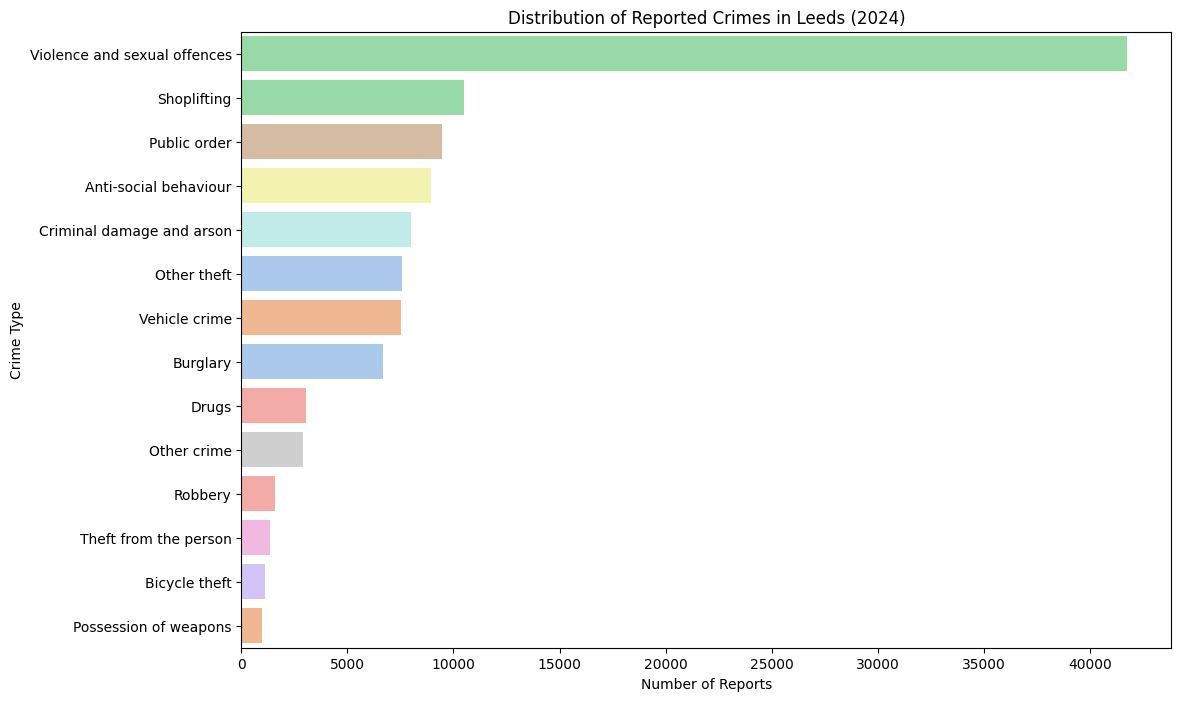

2. When is crime happening?


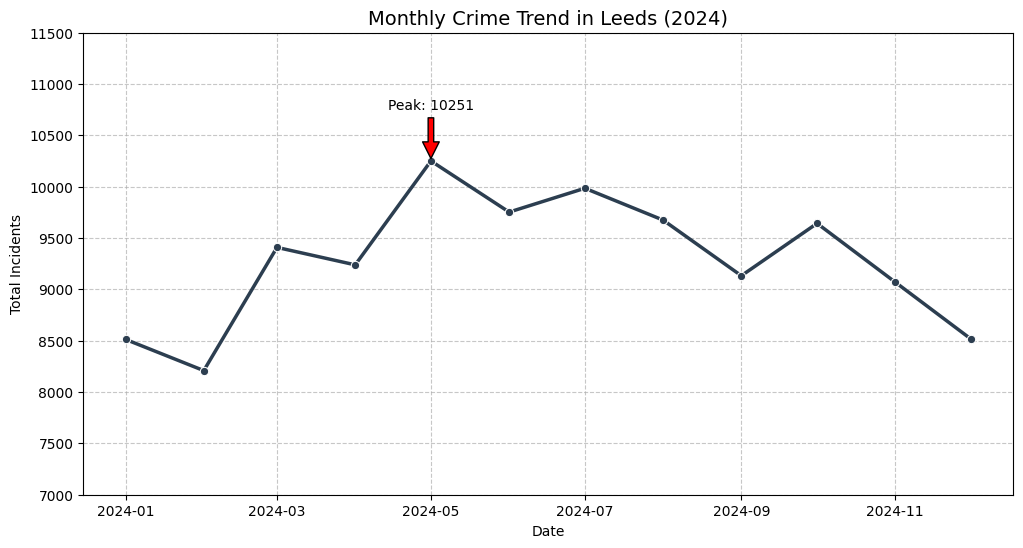

3. What are the seasonal trends?


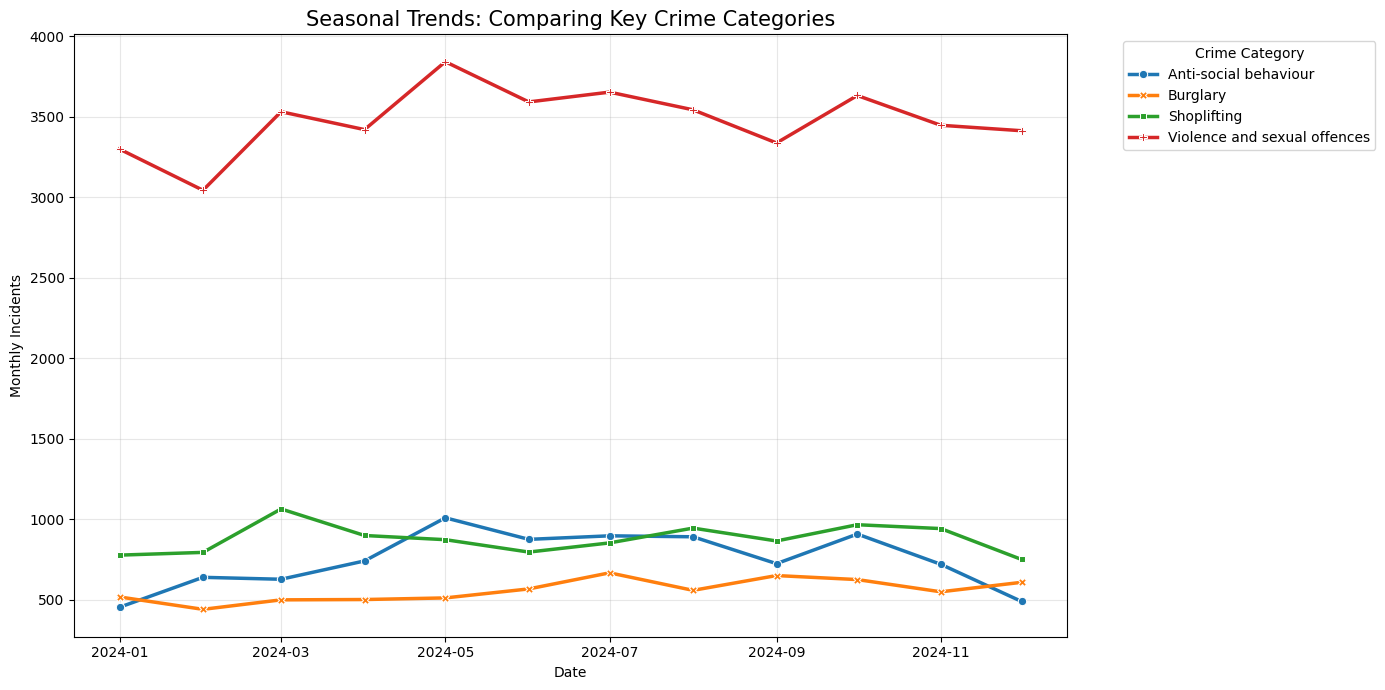

4. Which are top dangerous wards?


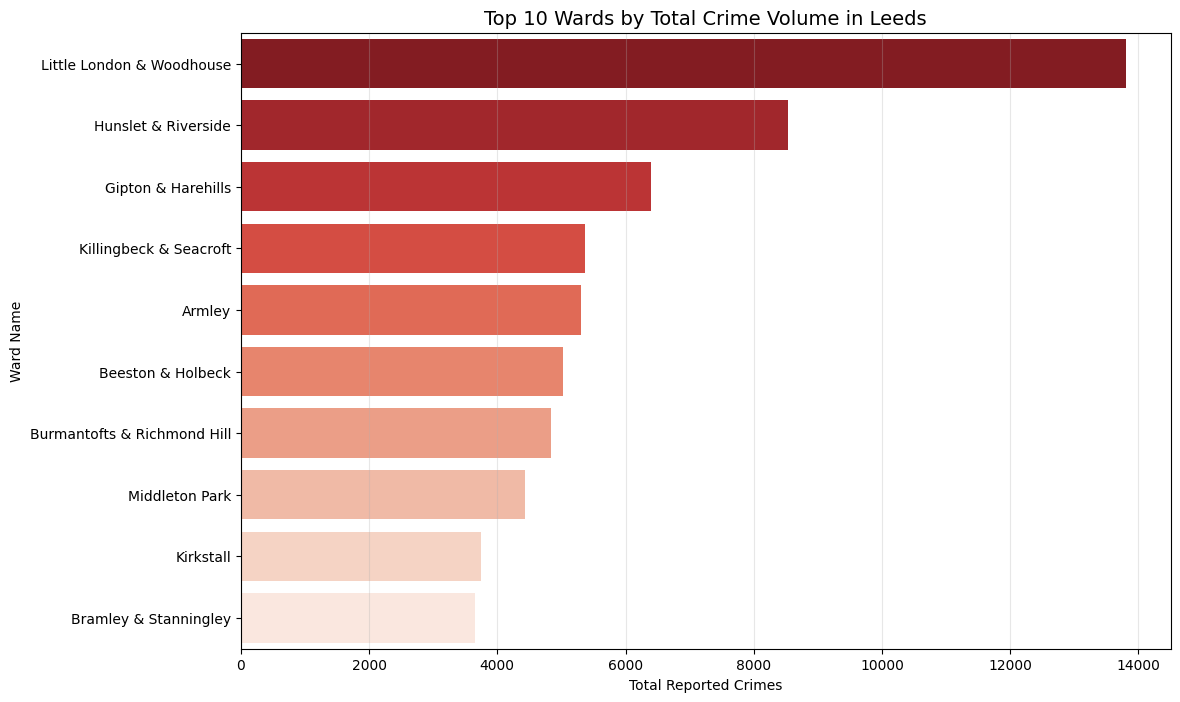

5. What are the outcomes?


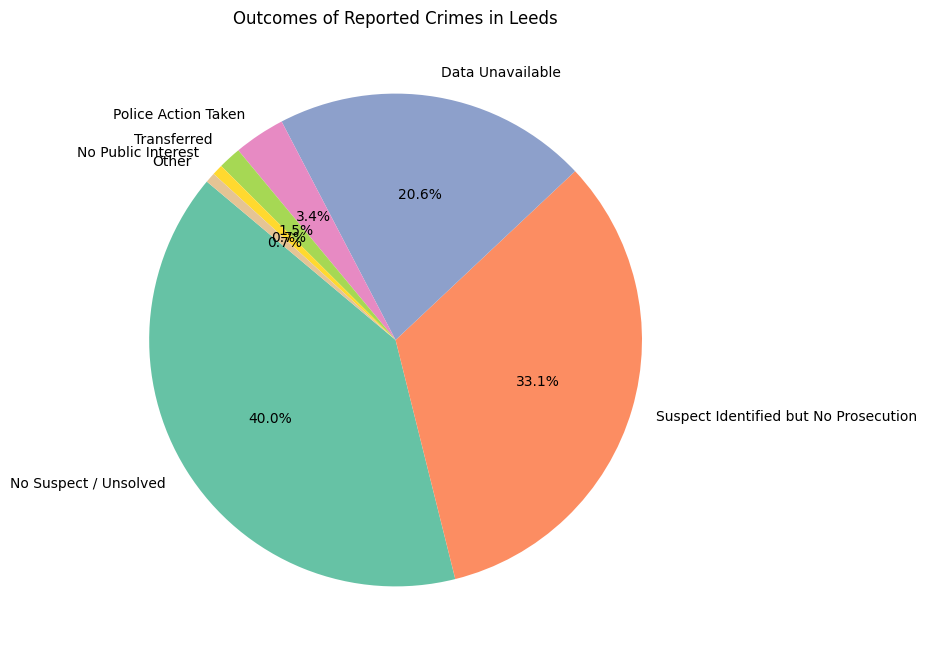

In [28]:
# --- Objective 2: Exploratory Data Analysis ---

print("1. What are the most frequent crimes?")
plot_crime_distribution(gdf_leeds_crimes)

print("2. When is crime happening?")
plot_monthly_trend(gdf_leeds_crimes)

print("3. What are the seasonal trends?")
plot_seasonal_trends(gdf_leeds_crimes)

print("4. Which are top dangerous wards?")
plot_top_wards(gdf_leeds_crimes, 10)

print("5. What are the outcomes?")
plot_outcome_distribution(gdf_leeds_crimes)

<h3>Geospatial Analysis<h3>

In [32]:
# Helper function to filter, count, merge, and clean data
def _prepare_map_data(gdf_crimes, gdf_wards, crime_type, count_col_name):
    # 1. Filter
    gdf_filtered = gdf_crimes[gdf_crimes['crime_type'] == crime_type]
    
    # 2. Count
    counts = gdf_filtered.groupby('ward_name', observed=False).size().reset_index(name=count_col_name)
    
    # 3. Merge
    # We use the correct columns for the merge
    gdf_map_data = gdf_wards.merge(counts, left_on='WD23NM', right_on='ward_name', how='left')
    
    # 4. Clean
    gdf_map_data[count_col_name] = gdf_map_data[count_col_name].fillna(0)
    
    return gdf_map_data

<b>Total Crime Map</b> <i>(Where are the crime hotspots in Leeds?)</i>

In [29]:
# Displays a labeled choropleth map for TOTAL crime incidents by ward.
def plot_total_crime_heatmap(gdf_crimes, wards_path):
    print("Generating Total Crime Heatmap...")

    ward_crime_counts = gdf_crimes.groupby("ward_name", observed=False).size().reset_index(name="crime_count")
    gdf_wards = gpd.read_file(wards_path)

    # Use the merge keys from your original code
    gdf_map = gdf_wards.merge(ward_crime_counts, left_on="WD23NM", right_on="ward_name", how="left")
    gdf_map["crime_count"] = gdf_map["crime_count"].fillna(0)  # Good practice

    fig, ax = plt.subplots(1, 1, figsize=(12, 12))

    gdf_map.plot(
        column="crime_count",
        cmap="OrRd",
        linewidth=0.5,
        ax=ax,
        edgecolor="0.8",
        legend=True,
        legend_kwds={"label": "Total Crime Incidents", "orientation": "horizontal"},
    )

    print("Adding ward labels...")
    for idx, row in gdf_map.iterrows():
        ax.annotate(
            text=row["ward_name"],
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            horizontalalignment="center",
            fontsize=6,
            color="black",
            weight="bold",
        )

    ax.axis("off")
    ax.set_title("Total Reported Crime by Ward in Leeds", fontsize=16, pad=20)
    plt.show()

<b>3-in-1 Comparative Map</b> <i>(Do different crimes happen in different places?)</i>

In [30]:
# Displays a 3-in-1 comparative map for ASB, Burglary, and Shoplifting.
def plot_comparative_crime_maps(gdf_crimes, wards_path):
    print("--- Creating 3-in-1 Comparative Map ---")

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

    # Load the base map ONCE
    gdf_wards = gpd.read_file(wards_path)

    # Map 1: Anti-social Behaviour
    print("Generating ASB map...")
    gdf_asb_map = _prepare_map_data(gdf_crimes, gdf_wards, "Anti-social behaviour", "asb_count")
    gdf_asb_map.plot(
        column="asb_count",
        cmap="Blues",
        linewidth=0.5,
        ax=ax1,
        edgecolor="0.8",
        legend=True,
        legend_kwds={"label": "ASB Incidents", "orientation": "horizontal"},
    )
    ax1.axis("off")
    ax1.set_title("Anti-social Behaviour Hotspots", fontsize=14)

    # Map 2: Burglary
    print("Generating Burglary map...")
    gdf_burglary_map = _prepare_map_data(gdf_crimes, gdf_wards, "Burglary", "burglary_count")
    gdf_burglary_map.plot(
        column="burglary_count",
        cmap="Greens",
        linewidth=0.5,
        ax=ax2,
        edgecolor="0.8",
        legend=True,
        legend_kwds={"label": "Burglary Incidents", "orientation": "horizontal"},
    )
    ax2.axis("off")
    ax2.set_title("Burglary Hotspots", fontsize=14)

    # Map 3: Shoplifting
    print("Generating Shoplifting map...")
    gdf_shoplifting_map = _prepare_map_data(gdf_crimes, gdf_wards, "Shoplifting", "shoplifting_count")
    gdf_shoplifting_map.plot(
        column="shoplifting_count",
        cmap="Reds",
        linewidth=0.5,
        ax=ax3,
        edgecolor="0.8",
        legend=True,
        legend_kwds={"label": "Shoplifting Incidents", "orientation": "horizontal"},
    )
    ax3.axis("off")
    ax3.set_title("Shoplifting Hotspots", fontsize=14)

    fig.suptitle("Comparative Crime Maps by Ward in Leeds", fontsize=20, y=1.02)
    plt.tight_layout()
    plt.show()

1. Show the main heatmap
Generating Total Crime Heatmap...
Adding ward labels...


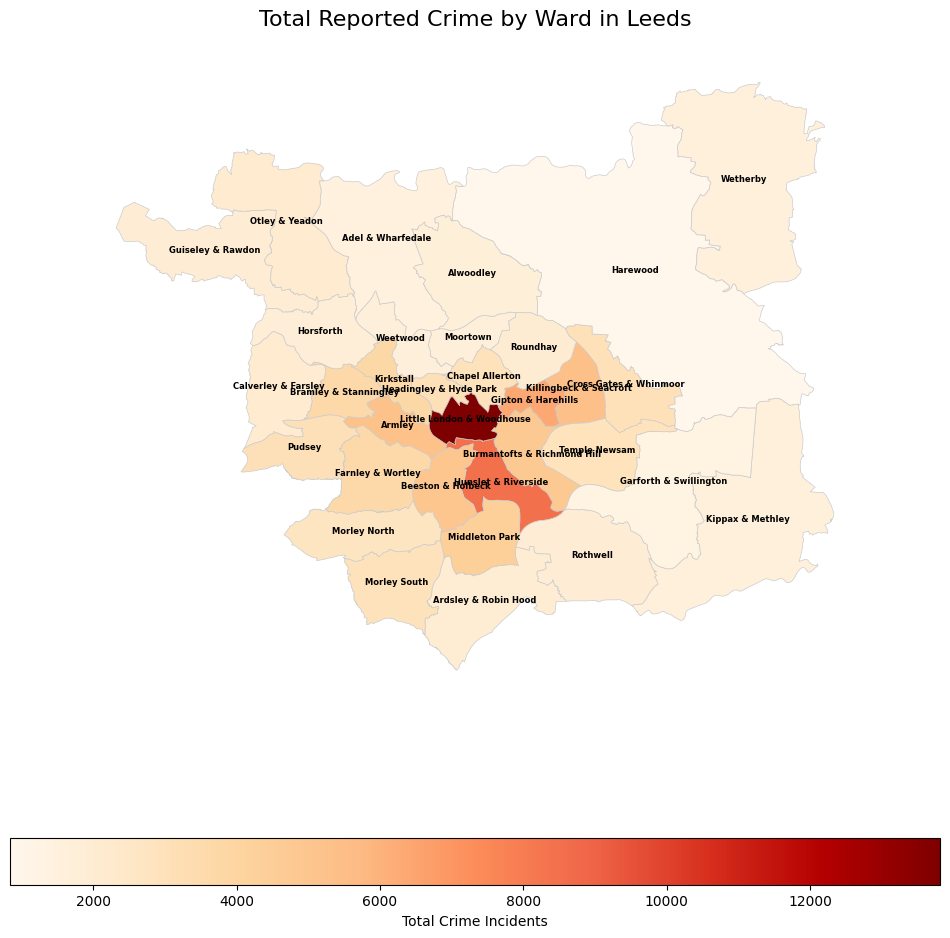

2. Show the comparative maps
--- Creating 3-in-1 Comparative Map ---
Generating ASB map...
Generating Burglary map...
Generating Shoplifting map...


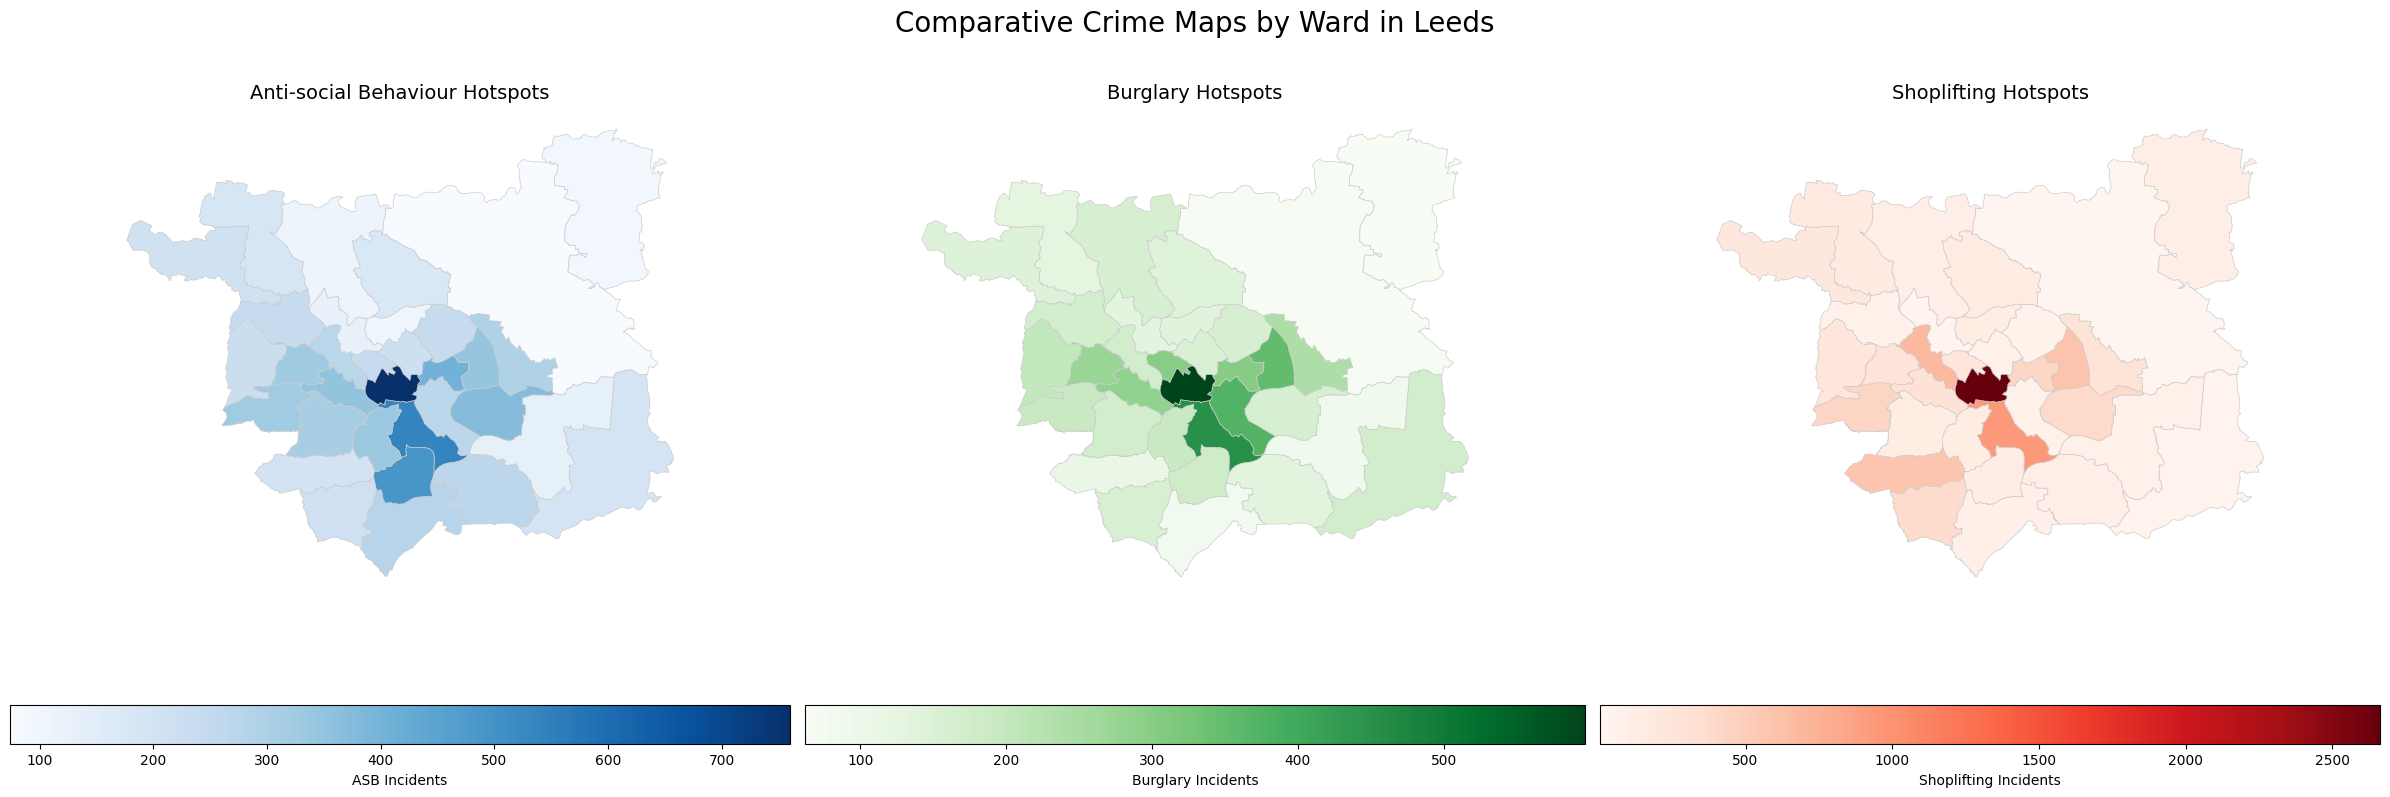

In [33]:
# --- Objective 3: Geospatial Analysis ---

print("1. Show the main heatmap")
plot_total_crime_heatmap(gdf_leeds_crimes, LEEDS_WARDS_PATH)

print("2. Show the comparative maps")
plot_comparative_crime_maps(gdf_leeds_crimes, LEEDS_WARDS_PATH)

<h3>The Comparative Analysis</h3>

In [34]:
# Adds an 'area_type' column to the GeoDataFrame based on ward names.
def tag_area_types(gdf: gpd.GeoDataFrame) -> gpd.GeoDataFrame:
    print("Tagging wards with area types...")

    # Classifies wards into 'City Centre', 'Student Residential', or 'Other Wards'.
    city_centre_ward = ["Little London & Woodhouse"]

    student_residential_wards = ["Headingley & Hyde Park", "Kirkstall"]

    conditions = [gdf["ward_name"].isin(city_centre_ward), gdf["ward_name"].isin(student_residential_wards)]

    choices = ["City Centre", "Student Residential"]

    gdf_tagged = gdf.copy()
    gdf_tagged["area_type"] = np.select(conditions, choices, default="Other Wards")

    # Convert to category for efficiency
    gdf_tagged["area_type"] = gdf_tagged["area_type"].astype("category")

    print("Tagging complete:")
    print(gdf_tagged["area_type"].value_counts())

    return gdf_tagged

In [35]:
# Calculates the normalized crime profile (fingerprint) for each area type.
def calculate_crime_profile(gdf_tagged: gpd.GeoDataFrame) -> pd.DataFrame:
    print("Calculating crime profile percentages...")

    crime_profile_table = pd.crosstab(gdf_tagged["area_type"], gdf_tagged["crime_type"], normalize="index")

    # Multiply by 100 to make it a nice percentage
    crime_profile_table = crime_profile_table * 100

    return crime_profile_table

In [36]:
# Generates the final 100% stacked horizontal bar chart.
def plot_crime_profile(profile_table: pd.DataFrame):
    print("Generating final 'Crime Fingerprint' chart...")

    ax = profile_table.plot(kind="barh", stacked=True, figsize=(14, 8), cmap="tab20")

    # Tidy up the chart
    ax.set_title("Crime Profile Comparison by Area Type", fontsize=16)
    ax.set_xlabel("Percentage of Total Crime (%)")
    ax.set_ylabel("Area Type")

    # Move the legend outside the chart
    ax.legend(title="Crime Type", bbox_to_anchor=(1.05, 1), loc="upper left")

    plt.tight_layout()
    plt.show()

Tagging wards with area types...
Tagging complete:
area_type
Other Wards            90742
City Centre            13813
Student Residential     6841
Name: count, dtype: int64
Calculating crime profile percentages...
Generating final 'Crime Fingerprint' chart...


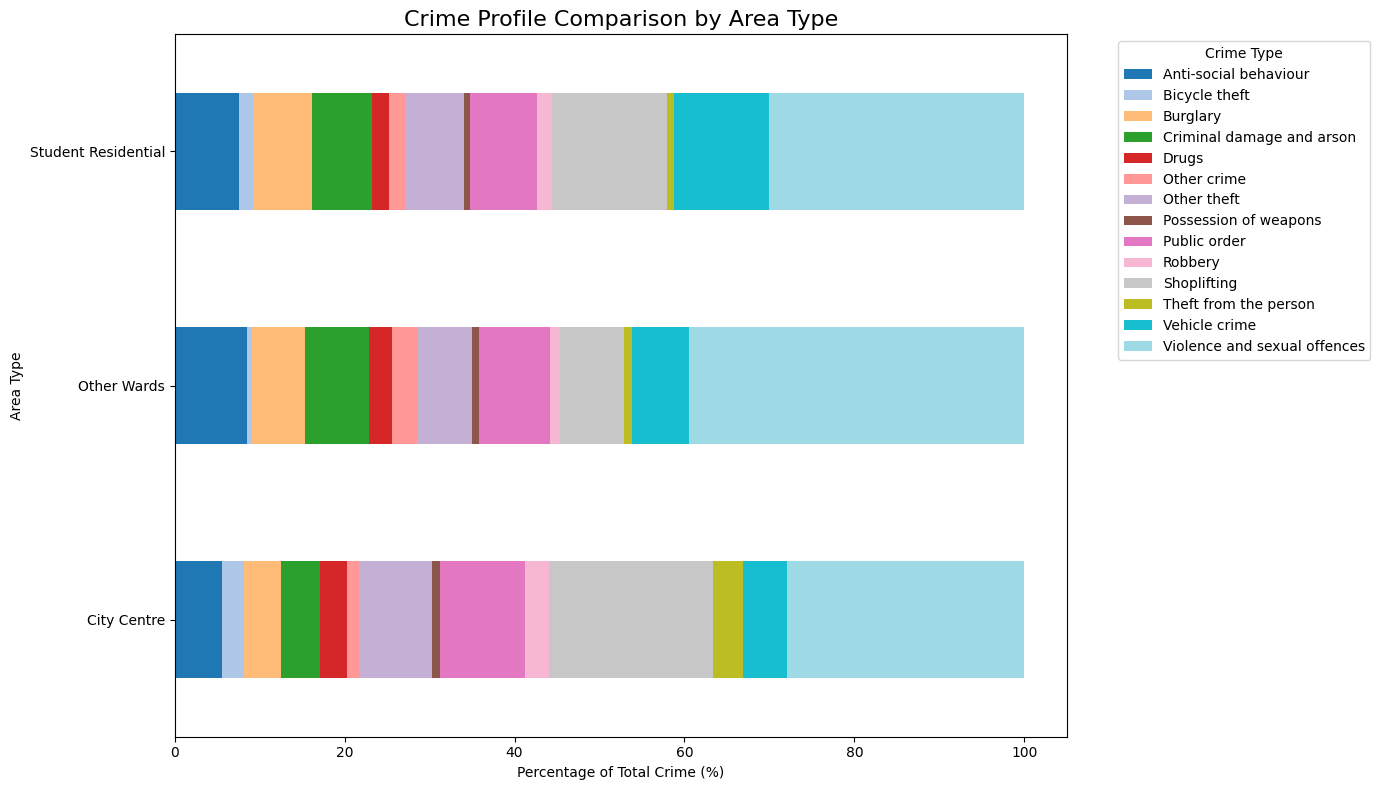

In [37]:
# --- Objective 4: Comparative Analysis ---

# 1. Add the 'area_type' column
gdf_tagged = tag_area_types(gdf_leeds_crimes)

# 2. Calculate the percentage profile
crime_profile_table = calculate_crime_profile(gdf_tagged)

# 3. Plot the final result
plot_crime_profile(crime_profile_table)

#### _Comment on previous cell output (optional)_

_As well as describing code, it will in many cases be informative to describe the output
that has been generated by a cell._

_The previous output cell shows a key number in our fridge magnet analysis._

#### _Brief Explanation of following code cell_

_Since fridge magnets often take the form of cute animals, we use `pandas` to convert the raw data into a `DataFrame`._

In [30]:
## Code Cell
import pandas
df = pandas.DataFrame.from_dict(fm_data, orient='index')
df

,0
souvenir,9
cute animal,5
meme,36
smiley,3
random image,13


#### _Comment on previous cell output (optional)_
_The output from the previous cell is very interesting._

_The following cell defines a visualisation function for the data._

In [31]:
def fridge_sorted_bar(color='blue'):
    df.sort_values(0).plot.bar( color=color)   

###  _More code cells_
_You can add as many code cells as you require, but it is
recommended that you break code into relatively small chunks and
do not exceed the maximum number of lines stated above._

# Project Outcome (10 + 10 marks)

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
_Give a general overview of the results (around 200 words)._

## Objective 1

### Explanation of Results

_200-400 words_

### Visualisation
_The following bar chart gives a vivid representation of the distribution
of fridge magnet types, in which the dominance of 'meme' type magnets
is dramatically illustrated._

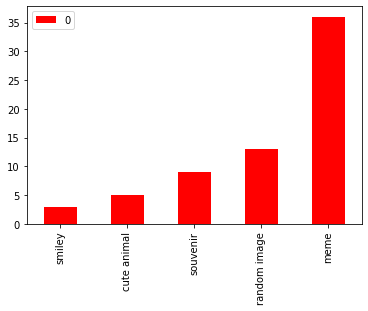

In [32]:
fridge_sorted_bar(color='red')

## Objective 2
### Explanation of Results

200-400 Words

### Visualisation

## Objective 3
### Explanation of Results

200-400 Words

### Visualisation

## Objective 4 
### Explanation of Results

200-400 Words

### Visualisation

# Conclusion (5 marks)

_Your concluding section should be around 200-400 words. It is recommended
that you divide it into the following sections._

### Achievements
_As we had expected, the most popular fridge magnets were of the 'meme' kind.
We were surprised that 'smiley' fridge magnets were less common than expected.
We conjecture that this is because, although they are apparently very popular,
few fridges display more than one smiley. However, 'meme' based magnets can
be found in large numbers, even on quite small fridges._

### Limitations

_The project was limited to a small number of fridge magents, which may not be
typical of fridges found in the global fridge magnet ecosystem._

### Future Work

_In future work we would like to obtain more diverse data and study fridge magnets 
beyond the limited confines of student accomodation. We hypothesise that there
could be a link between fridge magnet types and social class and/or educational
achievement._